# NLP EDA

Basically, exploration and modeling boil down to a single question:

How do we quantify our data (/a document)?

In this lesson, we'll explore answers to this question that will aid in visualization.

- word frequency (by label)
- ngrams
- word cloud
- sentiment analysis
- other common features

## Setup

Data is spam/ham text messages.

In [58]:
import matplotlib.pyplot as plt
import pandas as pd
import nltk
import unicodedata
import re
import seaborn as sns

In [54]:
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-darkgrid')

In [3]:
def clean(text):
    '''Simplified text cleaning function'''
    text = text.lower()
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return re.sub(r"[^a-z0-9\s]", '', text)

Data comes from https://www.kaggle.com/uciml/sms-spam-collection-dataset

In [4]:
df = pd.read_csv('./spam_clean.csv')
print(df.shape)
df.head()

(5572, 2)


,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [8]:
ham_words = clean(' '.join(df[df.label == 'ham'].text))
spam_words = clean(' '.join(df[df.label == 'spam'].text))
all_words = clean(' '.join(df.text))

## Exploration

Represent text as word frequencies.

In [9]:
ham_freq = pd.Series(ham_words.split()).value_counts()
spam_freq = pd.Series(spam_words.split()).value_counts()
all_freq = pd.Series(all_words.split()).value_counts()

In [10]:
word_counts = pd.concat([ham_freq, spam_freq, all_freq], axis=1).fillna(0).astype(int)
word_counts.columns = ['ham', 'spam', 'all']
word_counts.head()

,ham,spam,all
i,2305,45,2350
you,1837,287,2124
to,1554,686,2240
the,1118,204,1322
a,1055,376,1431


- What are the most frequently occuring words?
- Are there any words that uniquely identify a spam or ham message? I.e. words present in one type of message but not the other?
- Word cloud? 
- look at overlapping word frequencies
- maybe try combinations of words as well (i believe they're called ngrams) 
- 

In [14]:
word_counts.sort_values('all', ascending = False).head(20)

,ham,spam,all
i,2305,45,2350
to,1554,686,2240
you,1837,287,2124
a,1055,376,1431
the,1118,204,1322
u,986,147,1133
and,848,122,970
is,728,158,886
in,811,73,884
me,756,30,786


In [17]:
word_counts[word_counts.ham == 0]

,ham,spam,all
claim,0,113,113
prize,0,92,92
won,0,73,73
guaranteed,0,50,50
tone,0,48,48
...,...,...,...
09064012103,0,1,1
08714719523,0,1,1
mf,0,1,1
passes,0,1,1


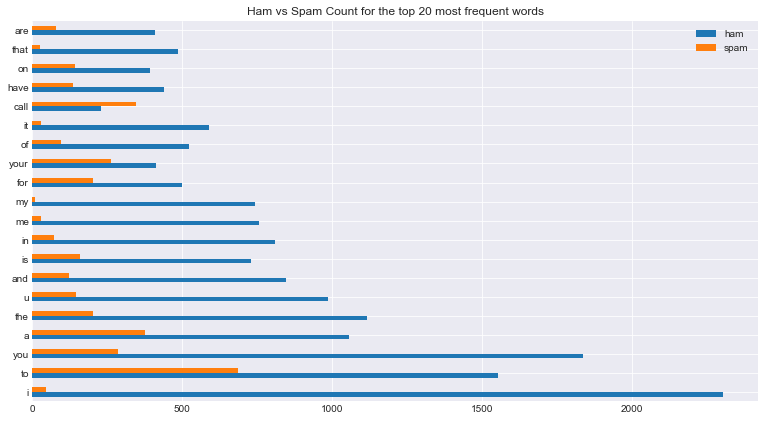

In [22]:
word_counts.sort_values('all', ascending = False).head(20)[['ham', 'spam']].plot.barh()
plt.title('Ham vs Spam Count for the top 20 most frequent words')
plt.show()

### Visualization

- ham vs spam count for 20 most common words
- ham vs spam proportion for 20 most common words

<AxesSubplot:>

<Figure size 1152x648 with 0 Axes>

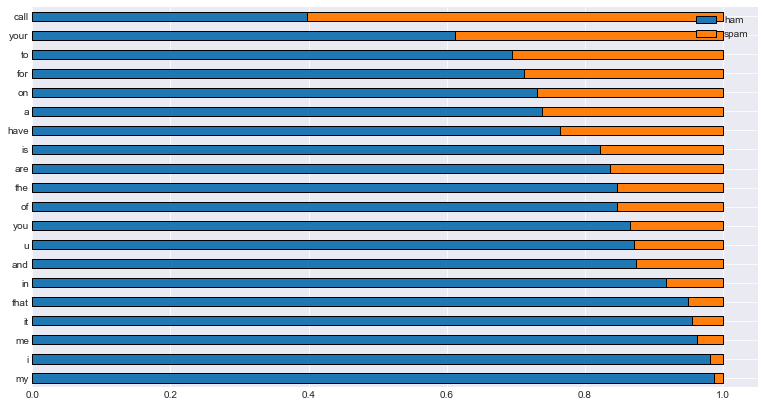

In [34]:
plt.figure(figsize = (16,9))

(word_counts.sort_values(by = 'all', ascending=False)
                        .head(20)
                        .apply(lambda row: row / row['all'], axis = 1)
                        .drop(columns = 'all')
                        .sort_values(by='spam')
                        .plot.barh(stacked = True, ec = 'black'))

## n-grams

**bigram**: combinations of 2 words

Represent text as combinations of 2 words

- what are the most common bigrams? spam bigrams? ham bigrams?
- visualize 20 most common bigrams, most common ham bigrams
- ngrams

Find the most common bigram and then find a representative text

**Careful** be sure to make bigrams out of *words* not letters

In [35]:
pd.Series(nltk.bigrams(spam_words.split())).value_counts()

(you, have)        73
(have, won)        54
(your, mobile)     49
(to, claim)        46
(please, call)     44
                   ..
(won, a5000)        1
(a, reply)          1
(rental, free)      1
(sale, arsenal)     1
(per, person)       1
Length: 8719, dtype: int64

Text(0.5, 1.0, 'Top 10 most common spam bigrams')

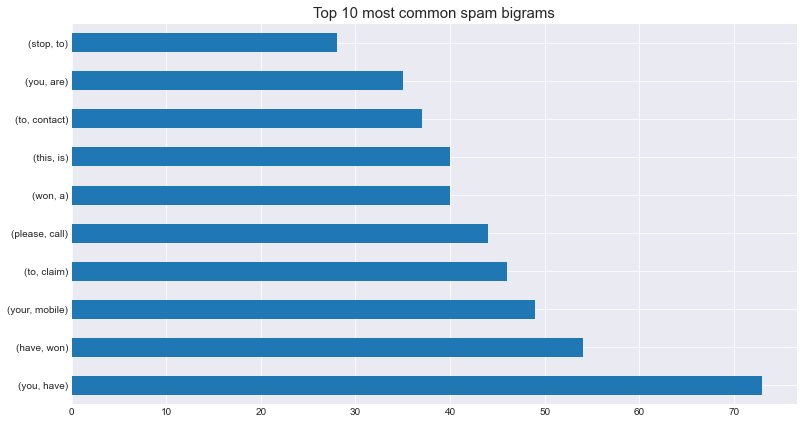

In [42]:

pd.Series(nltk.bigrams(spam_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common spam bigrams', fontsize = 15)

## Word Cloud

(-0.5, 799.5, 599.5, -0.5)

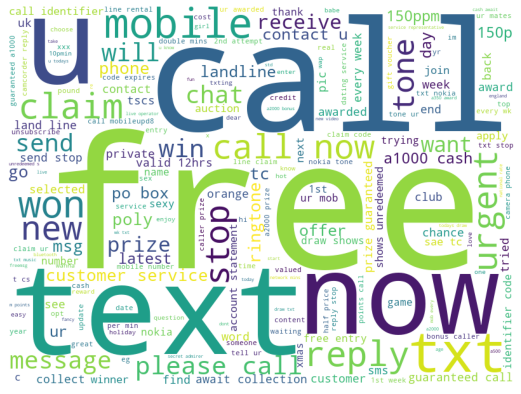

In [44]:
from wordcloud import WordCloud

img = WordCloud(background_color='white', width=800, height=600).generate(spam_words)
plt.imshow(img)
plt.axis('off')

## Other Common Features

Any NLP dataset will have domain specific features, for example: number of retweets, number of @mentions, number of upvotes, or mean time to respond to a support chat. In addition to these domain specific features, some common measures for a document are:

- character count
- word count
- sentence count
- stopword count
- unique word count
- punctuation count
- average word length
- average words per sentence
- word to stopword ratio

Create one or more of the above features and visualize it.

In [46]:
df['message_length'] = df.text.apply(len)

df.groupby('label').message_length.mean()

label
ham      71.023627
spam    138.866131
Name: message_length, dtype: float64

<AxesSubplot:ylabel='Frequency'>

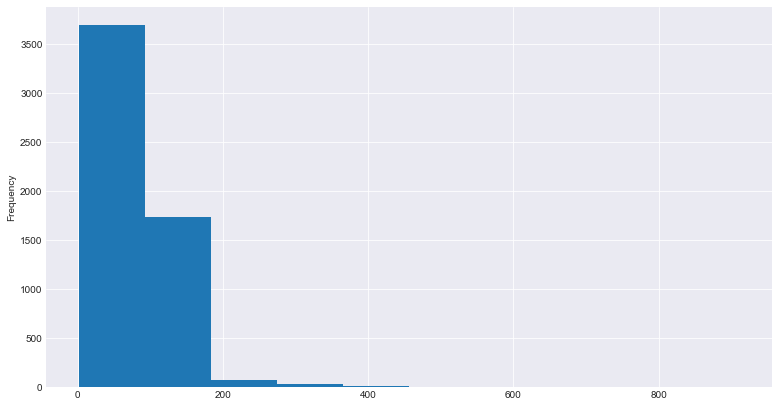

In [47]:
df.message_length.plot.hist()

In [50]:
df.text.apply(clean).apply(str.split).apply(len)

0       20
1        6
2       28
3       11
4       13
        ..
5567    30
5568     8
5569     9
5570    26
5571     6
Name: text, Length: 5572, dtype: int64

In [51]:
df['word_count'] = df.text.apply(clean).apply(str.split).apply(len)

<AxesSubplot:xlabel='message_length', ylabel='word_count'>

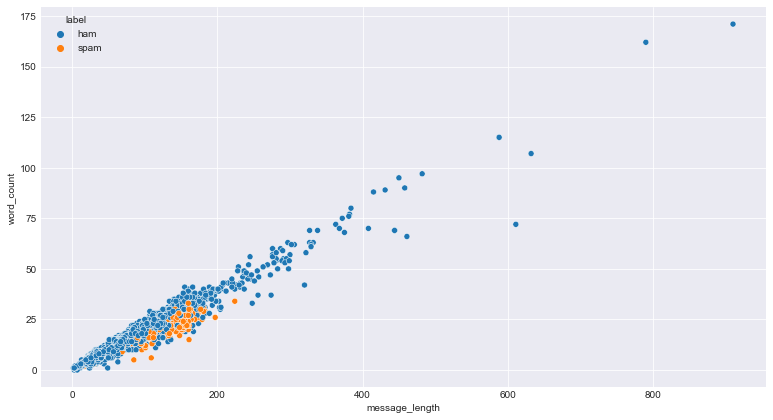

In [63]:
sns.scatterplot(data = df, x = 'message_length', y = 'word_count', hue = 'label')

<AxesSubplot:xlabel='message_length', ylabel='word_count'>

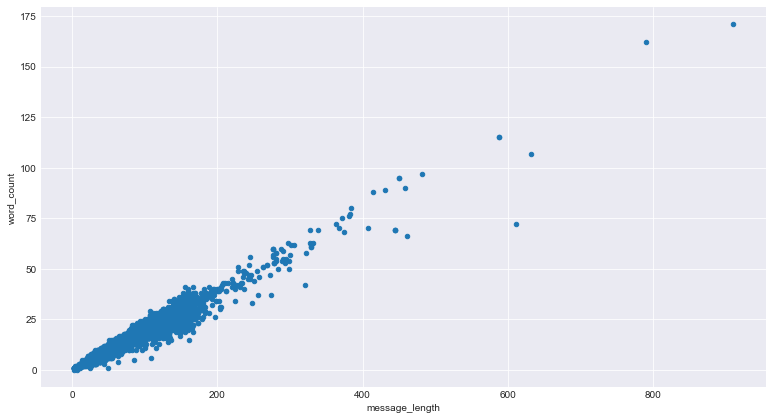

In [52]:
df.plot.scatter(y='word_count', x = 'message_length')

## Sentiment

A number indicating whether the document is positive or negative.

- knowledge-based + statistical approach
- relies on human-labelled data
    - valence scored wordlists
    - overall labels, measure is how well it compares to human judgement
- different models for diff domains (e.g. social media vs news)
- for social media
    - Afinn ([github](https://github.com/fnielsen/afinn) + [whitepaper](http://www2.imm.dtu.dk/pubdb/edoc/imm6006.pdf))
    - Vader ([whitepaper](http://comp.social.gatech.edu/papers/icwsm14.vader.hutto.pdf) `nltk.sentiment.vader.SentimentIntensityAnalyzer`)


In [74]:
import nltk.sentiment

sia = nltk.sentiment.SentimentIntensityAnalyzer()
sia.polarity_scores('This service is bad ass')

{'neg': 0.0, 'neu': 0.375, 'pos': 0.625, 'compound': 0.6124}

In [75]:
df['sentiment'] = df.text.apply(lambda doc: sia.polarity_scores(doc)['compound'])

In [78]:
df.sort_values(by = 'sentiment')

,label,text,message_length,word_count,sentiment
297,ham,Hurt me... Tease me... Make me cry... But in t...,153,35,-0.9304
4298,ham,Hurt me... Tease me... Make me cry... But in t...,153,35,-0.9304
3278,ham,Solve d Case : A Man Was Found Murdered On &l...,444,69,-0.9042
2680,ham,Solve d Case : A Man Was Found Murdered On &l...,444,69,-0.9042
2407,ham,Solve d Case : A Man Was Found Murdered On &l...,444,69,-0.9042
...,...,...,...,...,...
2222,ham,Great. I was getting worried about you. Just k...,175,34,0.9761
5318,ham,"Good morning, my Love ... I go to sleep now an...",159,31,0.9777
1084,ham,For me the love should start with attraction.i...,910,171,0.9808
1578,ham,How to Make a girl Happy? It's not at all diff...,611,72,0.9908


Apply this to the text message data

## More Resources

- [kaggle wikipedia movie plots](https://www.kaggle.com/jrobischon/wikipedia-movie-plots)
    - Suggestion: narrow to top n genres that aren't unknown
- [wikitable extractor](https://wikitable2csv.ggor.de/) (Try with, e.g. [helicopter prison escapes](https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes))
- [Textblob library](https://textblob.readthedocs.io/en/dev/)